# RakamTanima CNN

---


**Colab** için kimlik doğrulama adımları:

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


### Kurulum ve Kontroller

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2667423197183040400, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 447759450884525369
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

**Drive da dosya konumlandırmayı yapma işlemleri**

In [ ]:
import os
os.chdir("/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/")

In [ ]:
!ls 

Duygu_Tanima				   NesneTanima
Fashion_MNIST.ipynb			   RakamTanima_CNN.ipynb
model_fashion-mnist_cnn_train2_epoch24.h5  save_models


In [ ]:
!pip install -q keras
!pip install -q tensorflow

!pip install keras.utils 

### Uygulama Başlangıç

In [ ]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Veriden örnekleri görselleştirme

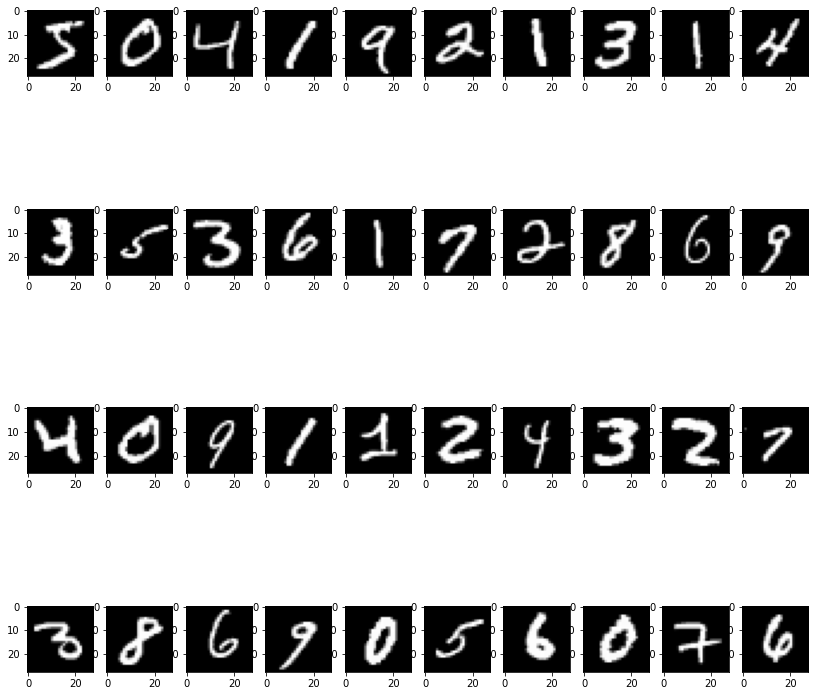

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [ ]:
batch_size = 128 
num_classes = 10 
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

## MODEL OLUŞTURMA

In [ ]:
model = Sequential() 

**Katmanların oluşturulması**

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 38s 16ms/step - loss: 19.8012 - accuracy: 0.1696 - val_loss: 3.5107 - val_accuracy: 0.4665
Epoch 2/6
469/469 [==============================] - 7s 15ms/step - loss: 9.6856 - accuracy: 0.2786 - val_loss: 1.5842 - val_accuracy: 0.6280
Epoch 3/6
469/469 [==============================] - 7s 15ms/step - loss: 5.5395 - accuracy: 0.3620 - val_loss: 1.0095 - val_accuracy: 0.6960
Epoch 4/6
469/469 [==============================] - 7s 15ms/step - loss: 3.5999 - accuracy: 0.4075 - val_loss: 0.9247 - val_accuracy: 0.6994
Epoch 5/6
469/469 [==============================] - 7s 15ms/step - loss: 2.6433 - accuracy: 0.4241 - val_loss: 1.0160 - val_accuracy: 0.6835
Epoch 6/6
469/469 [==============================] - 7s 15ms/step - loss: 2.1442 - accuracy: 0.4392 - val_loss: 1.1034 - val_accuracy: 0.6755


In [ ]:
model.save('/mnist_model.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 1.691769003868103
Test Accuracy: 0.4366999864578247


**Rastgele değer için test işlemi**

In [ ]:
model_test = model.save('save_models/mnist_model.h5')

In [ ]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

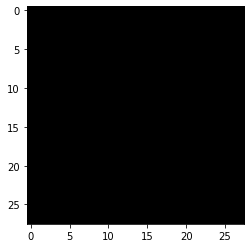

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)